This notebook evaluates the distance metric we created 
to measure the dissimilarity between actual images
and edited/unedited recorded images.

In [1]:
"""Run notebook from project root"""

import os
if os.path.split(os.getcwd())[-1] == "notebooks":
    %cd ..
print(f"Running notebook from {os.getcwd()}")

/Users/kincannonwilson/Desktop/School/Projection-Correction
Running notebook from /Users/kincannonwilson/Desktop/School/Projection-Correction


In [2]:
"""imports"""

import numpy as np
import matplotlib.pyplot as plt
from utils.metrics import distance
from utils.read_img import pathToCV2
from utils.transform_recorded import contour_perspective_transform
from utils.color import color_correct
from helpers import show_img_in_subplots, show_single_img

In [3]:
"""Minimum distance metric (same image)"""

white_img = np.ones((200,200,3), dtype=np.uint8) * 255
white_white_distance = distance(white_img, white_img)
white_white_distance

0.0

In [4]:
"""Maximum distance metric (maximally-dissimilar images)"""

black_img = np.zeros_like(white_img)
white_black_distance = distance(white_img, black_img)
white_black_distance

1.0

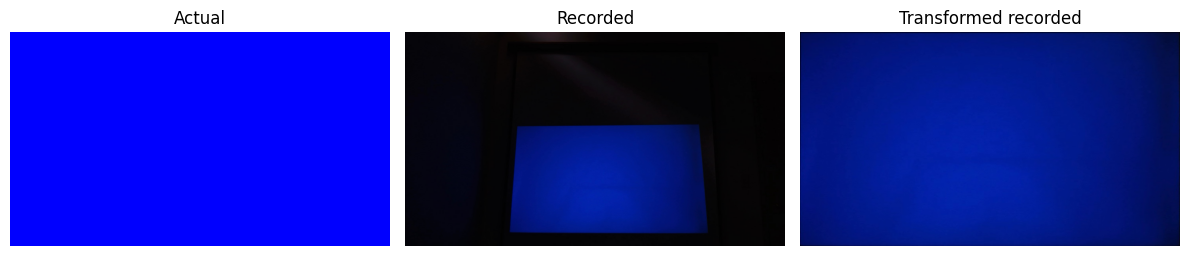

In [5]:
"""Show example images"""

blue_screen = pathToCV2("inputs/blue_screen.png")
recorded_blue = pathToCV2("inputs/captured_image.jpg")
transformed_recorded = contour_perspective_transform(blue_screen, recorded_blue)
images = [blue_screen, recorded_blue, transformed_recorded]
titles = ["Actual", "Recorded", "Transformed recorded"]
show_img_in_subplots(images, titles, 1, 3, (12,8))

In [6]:
"""Distances for example images"""

blue_recorded_distance = distance(blue_screen, recorded_blue)
blue_transformed_recorded_distance = distance(blue_screen, transformed_recorded)
blue_recorded_distance, blue_transformed_recorded_distance

(0.3003362753923586, 0.19303144227083838)

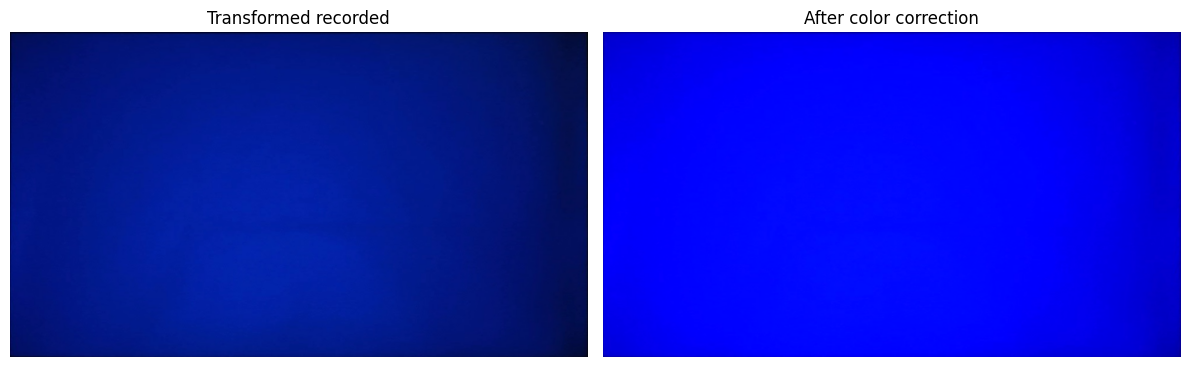

In [7]:
"""Attempt simple color correction"""

color_corrected_recorded = color_correct(transformed_recorded, blue_screen)
images = [transformed_recorded, color_corrected_recorded]
titles = ["Transformed recorded", "After color correction"]
show_img_in_subplots(images, titles, 1, 2, (12,8))

In [8]:
"""Check that distance decreased after color correction"""

color_corrected_distance = distance(blue_screen, color_corrected_recorded)
color_corrected_distance

0.01774199838114258

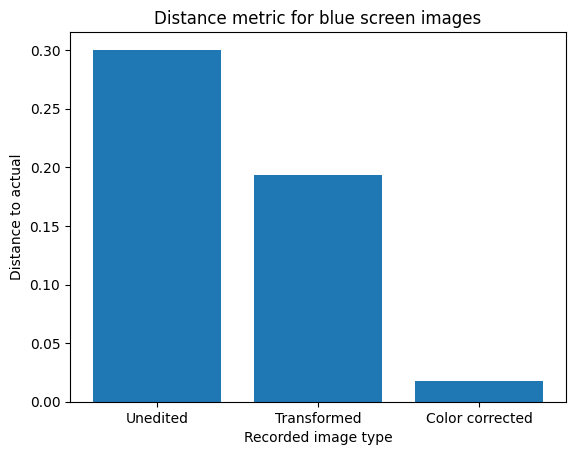

In [9]:
"""Plot the results"""

data = [blue_recorded_distance, blue_transformed_recorded_distance, color_corrected_distance]
titles = ["Unedited", "Transformed", "Color corrected"]
plt.bar(titles, data)
plt.title('Distance metric for blue screen images')
plt.xlabel('Recorded image type')
plt.ylabel('Distance to actual')
plt.show()

Looks like color correction did a great job in this simple case, 
resulting in a distance metric of just 2 percent! Let's check out
the distance metric on something a little more complicated now.

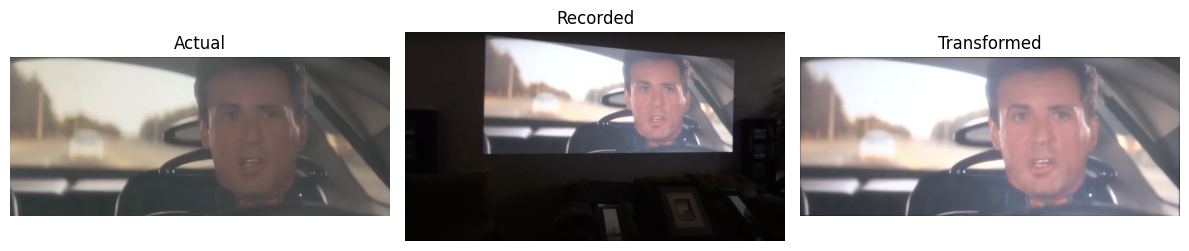

In [10]:
actual_frame = pathToCV2("inputs/actual_example1.png")
recorded_frame = pathToCV2("inputs/recorded_example1.png")
trans_frame = contour_perspective_transform(actual_frame, recorded_frame, (7,21))
images = [actual_frame, recorded_frame, trans_frame]
titles = ["Actual", "Recorded", "Transformed"]
show_img_in_subplots(images, titles, 1, 3, (12,8))

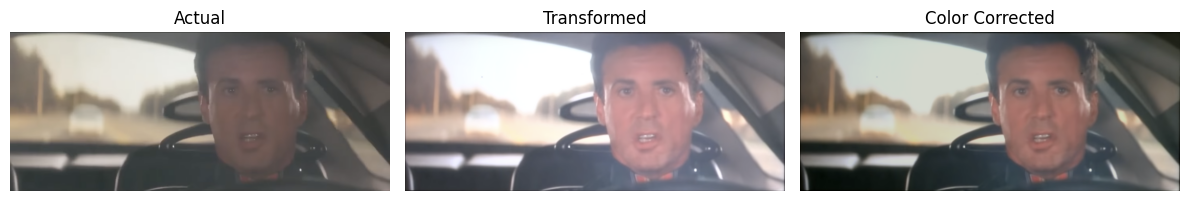

In [11]:
cc_frame = color_correct(trans_frame, actual_frame)
images = [actual_frame, trans_frame, cc_frame]
titles = ["Actual", "Transformed", "Color Corrected"]
show_img_in_subplots(images, titles, 1, 3, (12,8))

In [12]:
"""Compute distances for more realistic example"""

real_unedited_dist = distance(actual_frame, np.resize(recorded_frame, actual_frame.shape))
real_trans_dist = distance(actual_frame, trans_frame)
real_cc_dist = distance(actual_frame, cc_frame)
real_unedited_dist, real_trans_dist, real_cc_dist

(0.26685689273379576, 0.17078851635512451, 0.07162113936641139)

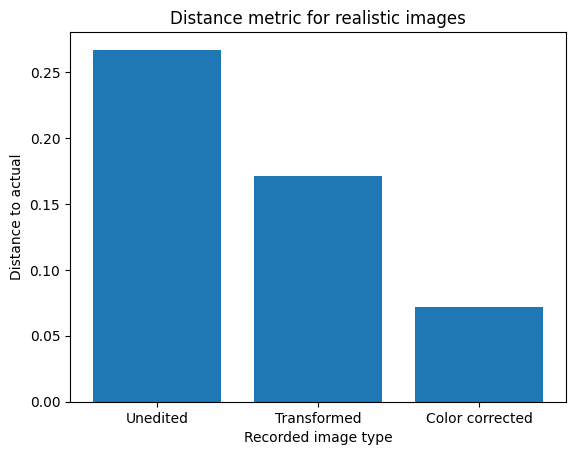

In [13]:
"""Plot the realistic results"""

data = [real_unedited_dist, real_trans_dist, real_cc_dist]
titles = ["Unedited", "Transformed", "Color corrected"]
plt.bar(titles, data)
plt.title('Distance metric for realistic images')
plt.xlabel('Recorded image type')
plt.ylabel('Distance to actual')
plt.show()

This more realistic example shows how our manually-created pipeline of 
cropping the recorded image and color correcting it results in a
distance of over 7% from the actual image (even when the projection 
surface in the example is relatively smooth).